# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
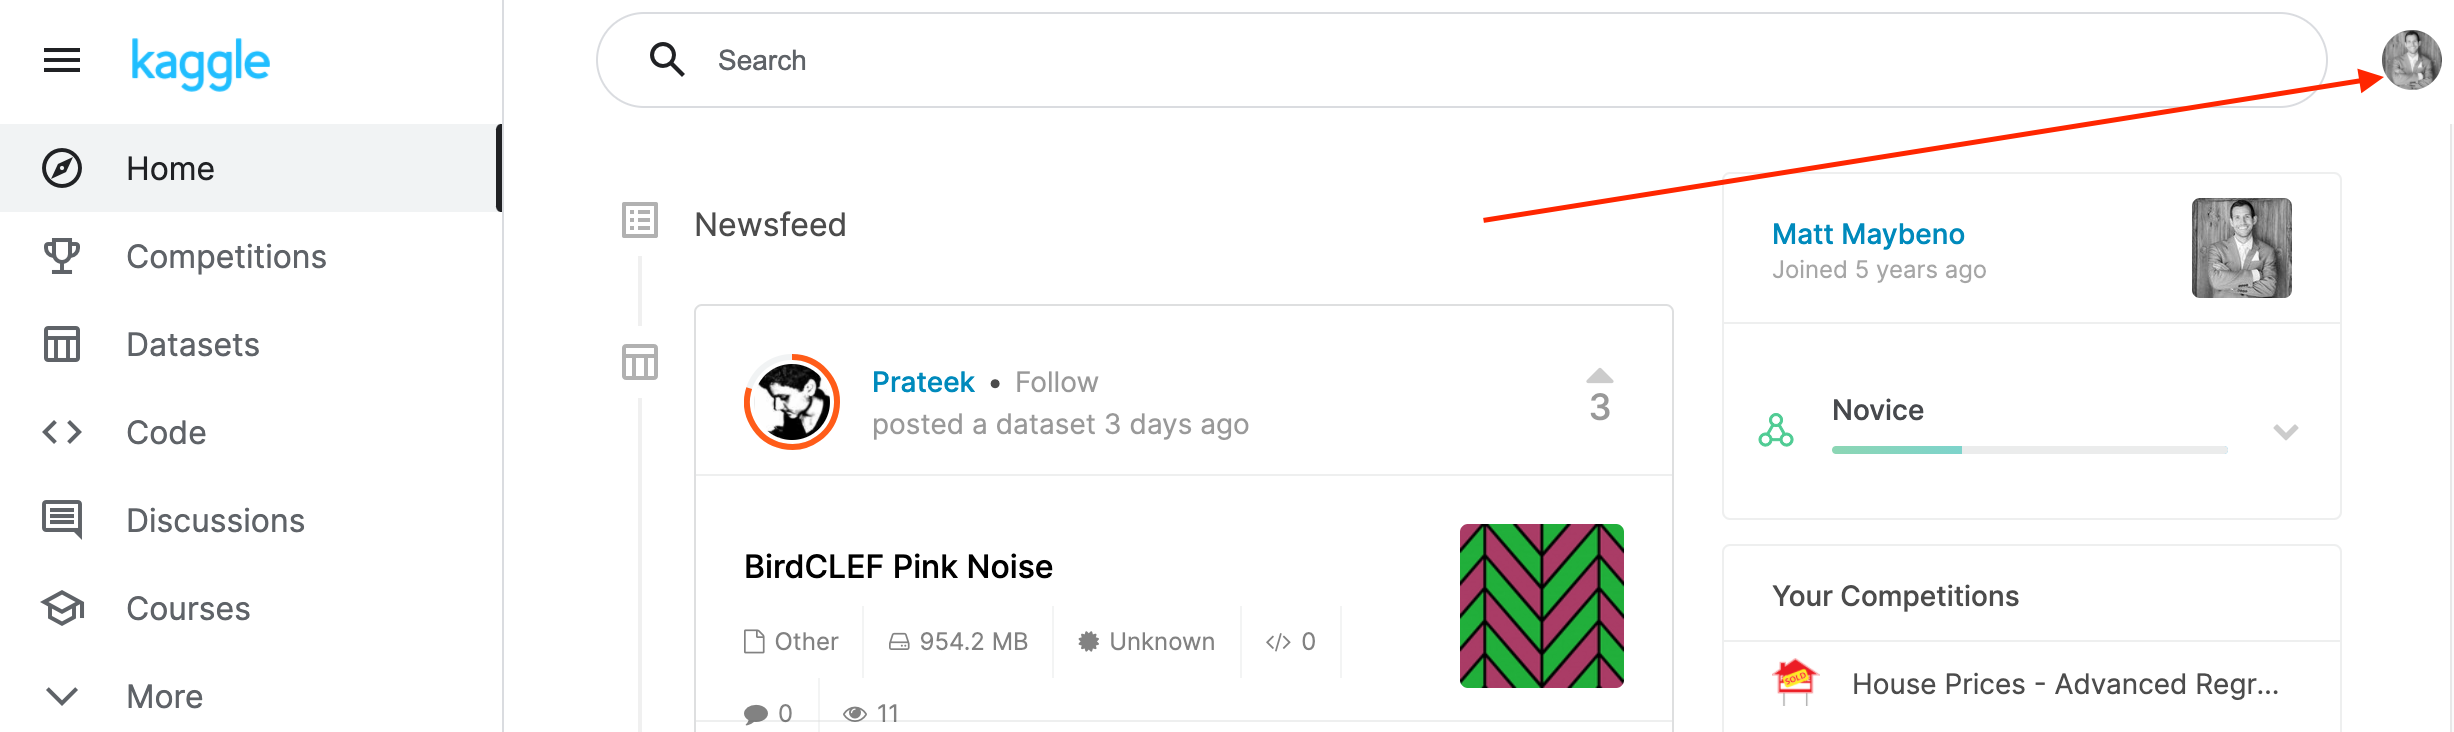
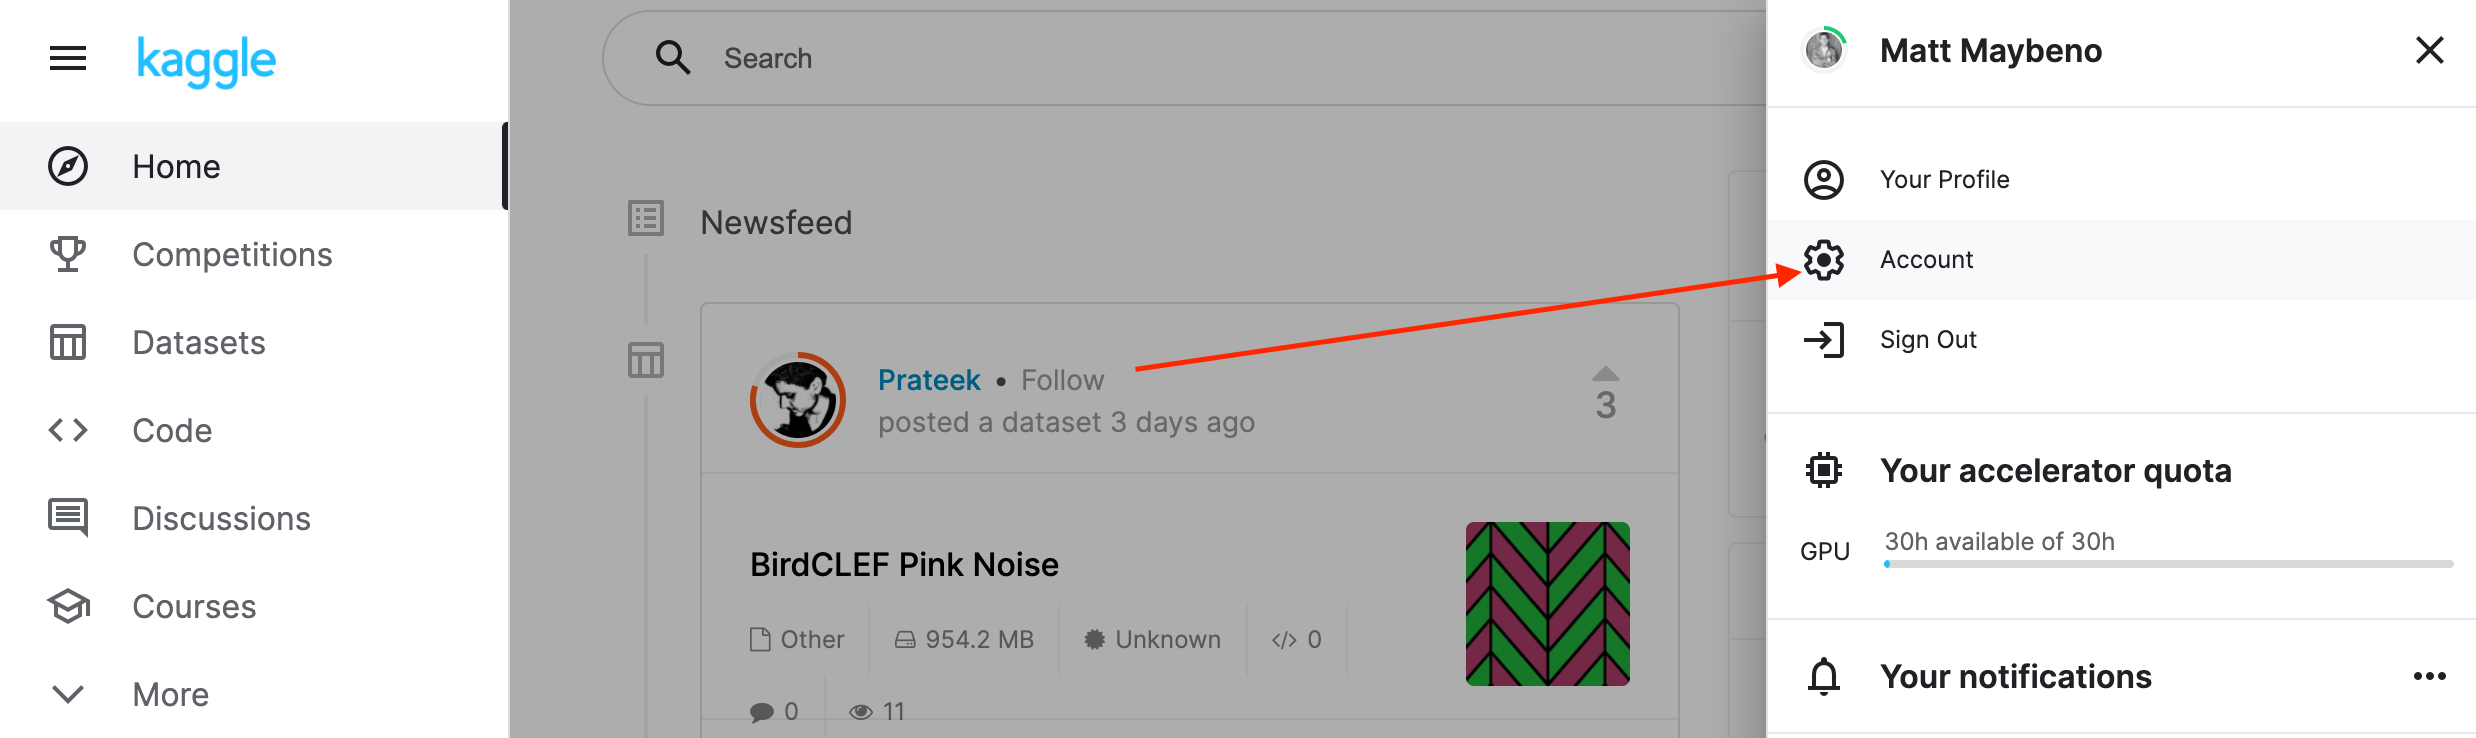
2. Scroll down to API and click Create New API Token.
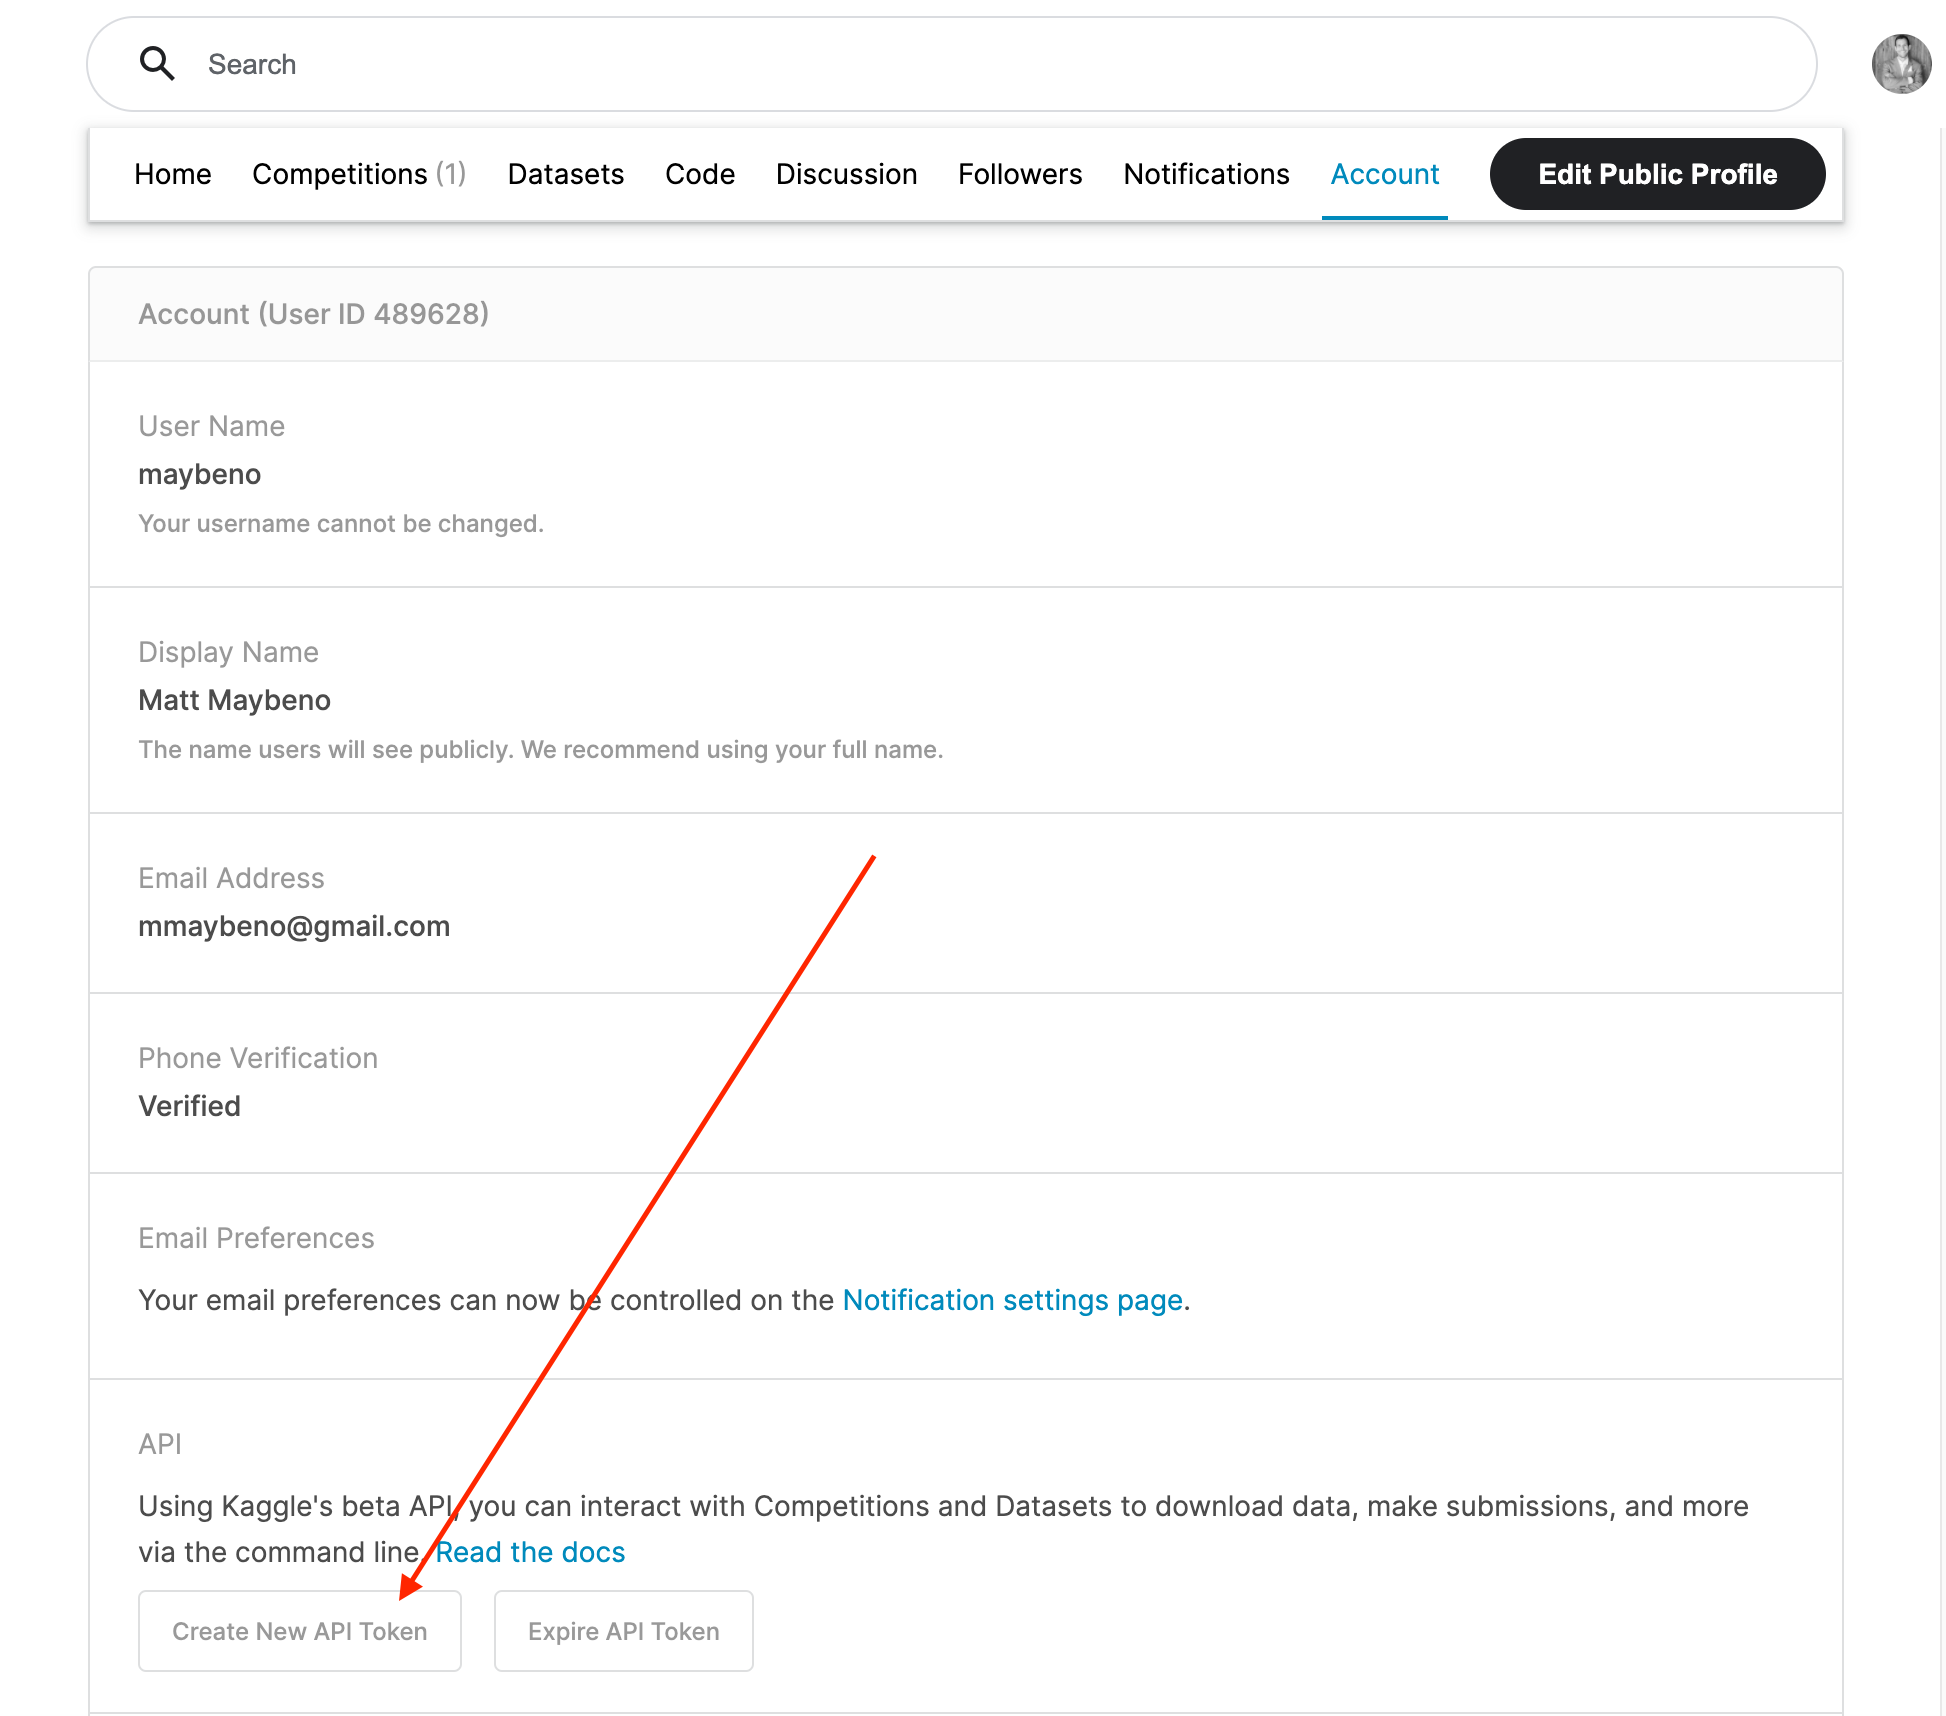
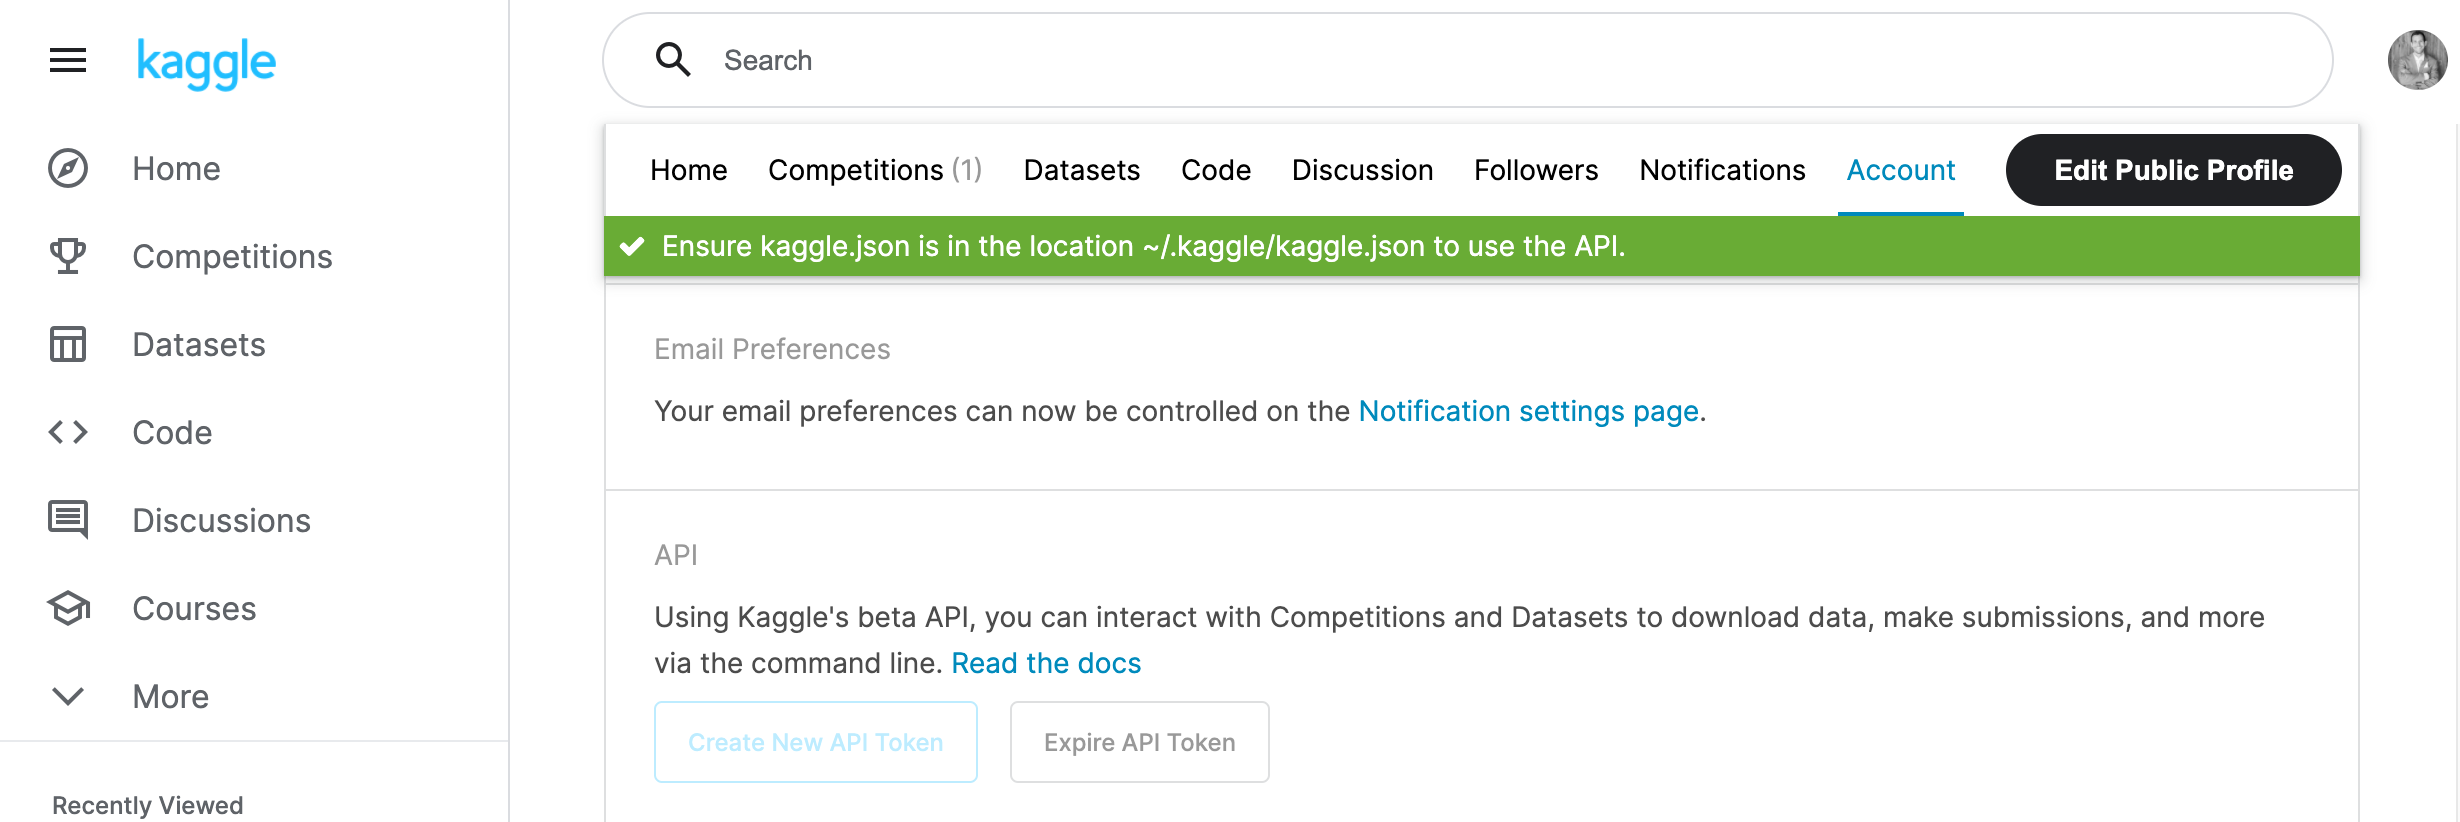
3. Open up `kaggle.json` and use the username and key.
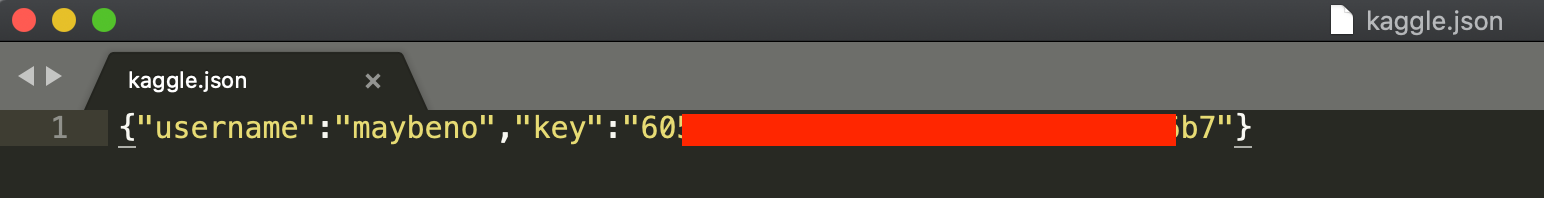

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "markmelling"
kaggle_key = "c8607b6e811e91ab6dc4ff6a9d7074fe"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
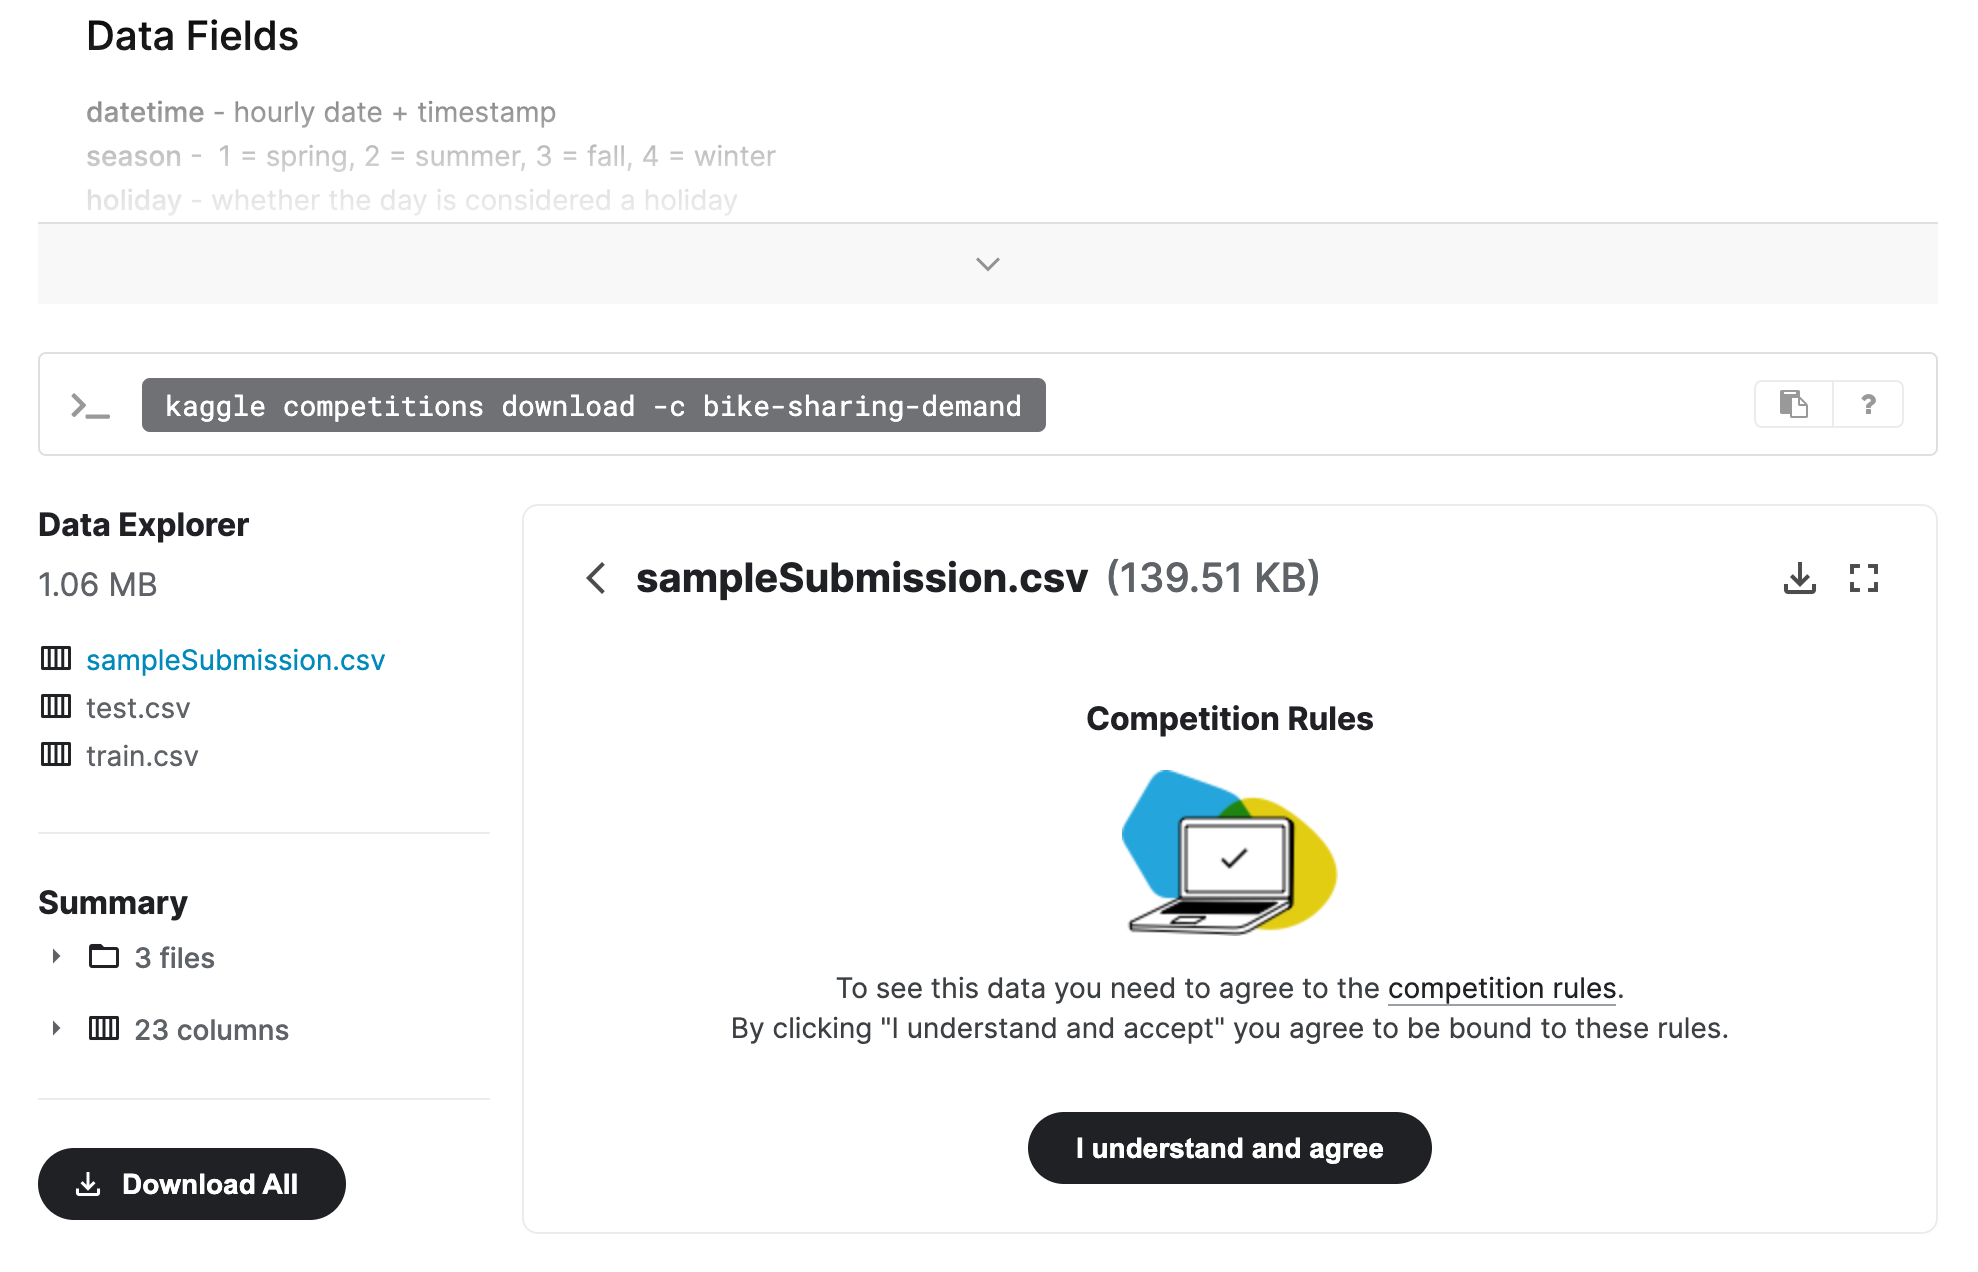

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

In [14]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [26]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('data/train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [16]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [27]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('data/test.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [29]:
# Same thing as train and test dataset
submission = pd.read_csv('data/sampleSubmission.csv', parse_dates=['datetime'])
submission.head()


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [5]:
help(TabularPredictor)

Help on class TabularPredictor in module autogluon.tabular.predictor.predictor:

class TabularPredictor(builtins.object)
 |  TabularPredictor(label, problem_type=None, eval_metric=None, path=None, verbosity=2, sample_weight=None, weight_evaluation=False, groups=None, **kwargs)
 |  
 |  AutoGluon TabularPredictor predicts values in a column of a tabular dataset (classification or regression).
 |  
 |  Parameters
 |  ----------
 |  label : str
 |      Name of the column that contains the target variable to predict.
 |  problem_type : str, default = None
 |      Type of prediction problem, i.e. is this a binary/multiclass classification or regression problem (options: 'binary', 'multiclass', 'regression', 'quantile').
 |      If `problem_type = None`, the prediction problem type is inferred based on the label-values in provided dataset.
 |  eval_metric : function or str, default = None
 |      Metric by which predictions will be ultimately evaluated on test data.
 |      AutoGluon tunes f

In [8]:
help(TabularPredictor.fit)

Help on function fit in module autogluon.tabular.predictor.predictor:

fit(self, train_data, tuning_data=None, time_limit=None, presets=None, hyperparameters=None, feature_metadata='infer', **kwargs)
    Fit models to predict a column of a data table (label) based on the other columns (features).
    
    Parameters
    ----------
    train_data : str or :class:`TabularDataset` or :class:`pd.DataFrame`
        Table of the training data, which is similar to a pandas DataFrame.
        If str is passed, `train_data` will be loaded using the str value as the file path.
    tuning_data : str or :class:`TabularDataset` or :class:`pd.DataFrame`, default = None
        Another dataset containing validation data reserved for tuning processes such as early stopping and hyperparameter tuning.
        This dataset should be in the same format as `train_data`.
        If str is passed, `tuning_data` will be loaded using the str value as the file path.
        Note: final model returned may be fit

In [89]:
predictor = TabularPredictor(label='count',
                             problem_type='regression',
                             eval_metric='root_mean_squared_error',
                             **{'learner_kwargs':
                             {'ignored_columns':['casual', 'registered']}}).fit(train,
                                                                           presets='best_quality',
                                                                           time_limit=600)

No path specified. Models will be saved in: "AutogluonModels/ag-20211123_223813/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20211123_223813/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 11
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    15237.78 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatur

	Ran out of time, early stopping on iteration 95. Best iteration is:
	[95]	train_set's rmse: 139.366	valid_set's rmse: 137.263
	-142.5014	 = Validation score   (root_mean_squared_error)
	386.0s	 = Training   runtime
	0.22s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 12.95s of the 212.93s of remaining time.
/home/mark.melling/projects/education/udacity/nd189-1-Introduction-to-Machine-Learning-project-starter/project/venv/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	train_set's rmse: 177.983	valid_set's rmse: 176.179
/home/mark.melling/projects/education/udacity/nd189-1-Introduction-to-Machine-Lea

	Ran out of time, early stopping on iteration 44. Best iteration is:
	[44]	train_set's rmse: 120.723	valid_set's rmse: 120.934
/home/mark.melling/projects/education/udacity/nd189-1-Introduction-to-Machine-Learning-project-starter/project/venv/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Ran out of time, early stopping on iteration 53. Best iteration is:
	[53]	train_set's rmse: 119.151	valid_set's rmse: 115.747
	-123.4105	 = Validation score   (root_mean_squared_error)
	191.49s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 6.06s of the 6.05s of remaining time.
/home/mark.melling/projects/education/udacity/nd189-1-Introduction-to-Machine-Lea

### Review AutoGluon's training run with ranking of models that did the best.

In [90]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  RandomForestMSE_BAG_L1 -118.456660       0.477796    7.529197                0.477796           7.529197            1       True          4
1     WeightedEnsemble_L2 -118.456660       0.478687    7.982018                0.000891           0.452821            2       True          5
2     WeightedEnsemble_L3 -120.060233       1.599266  603.932034                0.002403           0.338412            3       True          8
3  RandomForestMSE_BAG_L2 -121.873597       1.428380  412.102880                0.618679          18.440779            2       True          7
4       LightGBMXT_BAG_L2 -123.410487       0.978184  585.152842                0.168483         191.490742            2       True          6
5       LightGBMXT_BAG_L1 -142.501399       0.216827  385.996287                

/home/mark.melling/projects/education/udacity/nd189-1-Introduction-to-Machine-Learning-project-starter/project/venv/lib/python3.8/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -160.4130779463501,
  'KNeighborsDist_BAG_L1': -169.55209635208928,
  'LightGBMXT_BAG_L1': -142.50139893945928,
  'RandomForestMSE_BAG_L1': -118.45666016795705,
  'WeightedEnsemble_L2': -118.45666016795705,
  'LightGBMXT_BAG_L2': -123.41048659825651,
  'RandomForestMSE_BAG_L2': -121.87359717812151,
  'WeightedEnsemble_L3': -120.0602334247871},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels/ag-20211123_223813/models/KNeighborsUnif_BAG_L1/',
  'KNeighborsDist_BA

### Create predictions from test dataset

In [91]:
predictions = predictor.predict(test)

predictions.head()

0    94.760002
1    89.483330
2    89.483330
3    96.733330
4    96.733330
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [92]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      208.258896
std       126.162056
min         7.173333
25%       109.669998
50%       186.686661
75%       281.010010
max       691.289978
Name: count, dtype: float64

In [93]:
# How many negative values do we have?
len(predictions[predictions < 0])

0

In [ ]:
# Set them to zero
?

### Set predictions to submission dataframe, save, and submit

In [94]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [95]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 183k/183k [00:01<00:00, 111kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [96]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2021-11-24 07:26:10  first raw submission  complete  1.37974      1.37974       
submission.csv  2021-11-23 08:26:32  first raw submission  complete  1.37974      1.37974       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [85]:
mtrain = train.copy()


In [86]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
#help(train.hist)
mtrain['year'] = mtrain['datetime'].dt.year
mtrain['month'] = mtrain['datetime'].dt.month
mtrain['hour'] = mtrain['datetime'].dt.hour
mtrain['dayofweek'] = mtrain['datetime'].dt.dayofweek
mtrain.drop(columns=['datetime'], inplace=True)
#train_dt = train.set_index('datetime')
#train_dt.head()
#train_dt.plot.scatter(figsize=(16,18))
#ax = train.plot(kind="scatter", x="datetime",y="a", color="b", label="a vs. x")
categories = ['season','weather','dayofweek', 'workingday', 'holiday']
mtrain[categories] = mtrain[categories].astype('category')
mtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  category
 2   workingday  10886 non-null  category
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   casual      10886 non-null  int64   
 9   registered  10886 non-null  int64   
 10  count       10886 non-null  int64   
 11  year        10886 non-null  int64   
 12  month       10886 non-null  int64   
 13  hour        10886 non-null  int64   
 14  dayofweek   10886 non-null  category
dtypes: category(5), float64(3), int64(7)
memory usage: 904.7 KB


<AxesSubplot:xlabel='holiday', ylabel='count'>

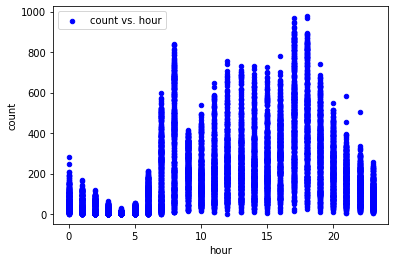

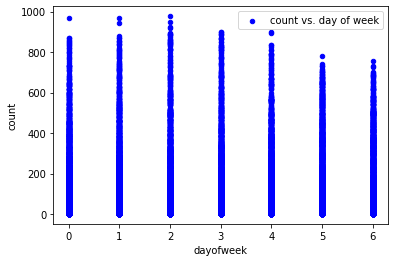

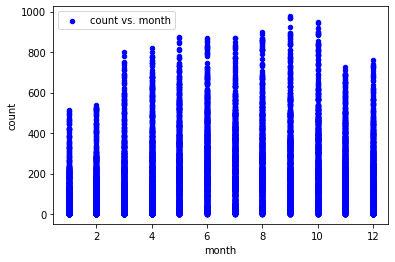

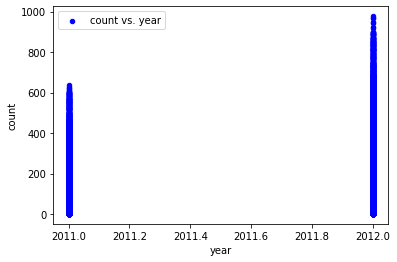

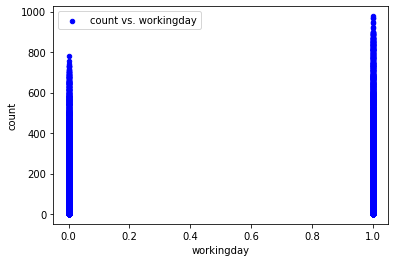

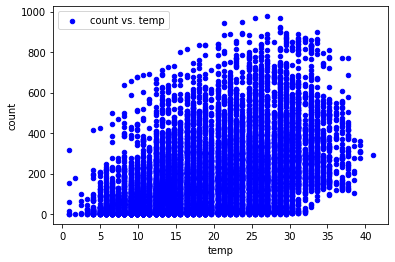

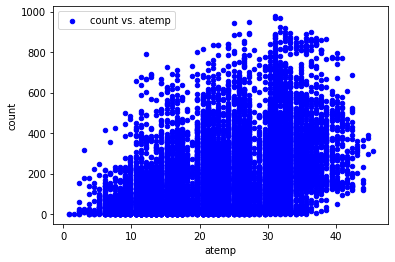

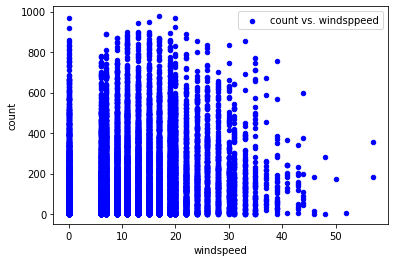

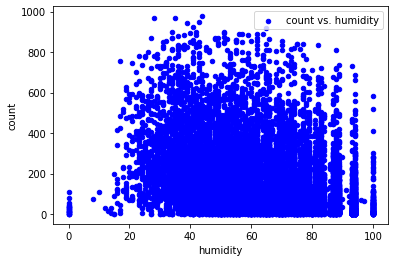

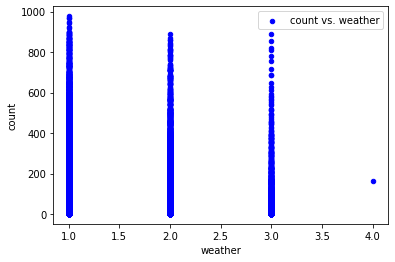

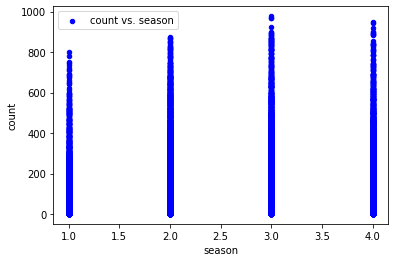

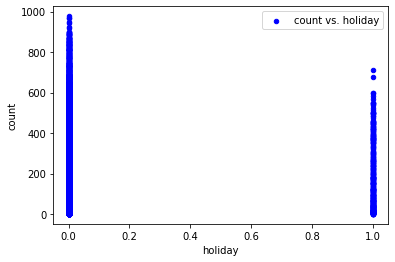

In [98]:
ax = mtrain.plot(kind="scatter", x="hour",y="count", color="b", label="count vs. hour")
mtrain.plot(kind="scatter", x="dayofweek",y="count", color="b", label="count vs. day of week")
mtrain.plot(kind="scatter", x="month",y="count", color="b", label="count vs. month")
mtrain.plot(kind="scatter", x="year",y="count", color="b", label="count vs. year")
mtrain.plot(kind="scatter", x="workingday",y="count", color="b", label="count vs. workingday")
mtrain.plot(kind="scatter", x="temp",y="count", color="b", label="count vs. temp")
mtrain.plot(kind="scatter", x="atemp",y="count", color="b", label="count vs. atemp")
mtrain.plot(kind="scatter", x="windspeed",y="count", color="b", label="count vs. windsppeed")
mtrain.plot(kind="scatter", x="humidity",y="count", color="b", label="count vs. humidity")
mtrain.plot(kind="scatter", x="weather",y="count", color="b", label="count vs. weather")
mtrain.plot(kind="scatter", x="season",y="count", color="b", label="count vs. season")
mtrain.plot(kind="scatter", x="holiday",y="count", color="b", label="count vs. holiday")


In [99]:
# create a new feature
train['month'] = train['datetime'].dt.month
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek
#train.drop(columns=['datetime'], inplace=True)

test['month'] = test['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek



## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [100]:
categories = ['season','weather','dayofweek', 'workingday', 'holiday']
train[categories] = train[categories].astype('category')
test[categories] = test[categories].astype('category')

#train["season"] = ?
#train["weather"] = ?
#test["season"] = ?
#test["weather"] = ?

In [101]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,5


array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'hour'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

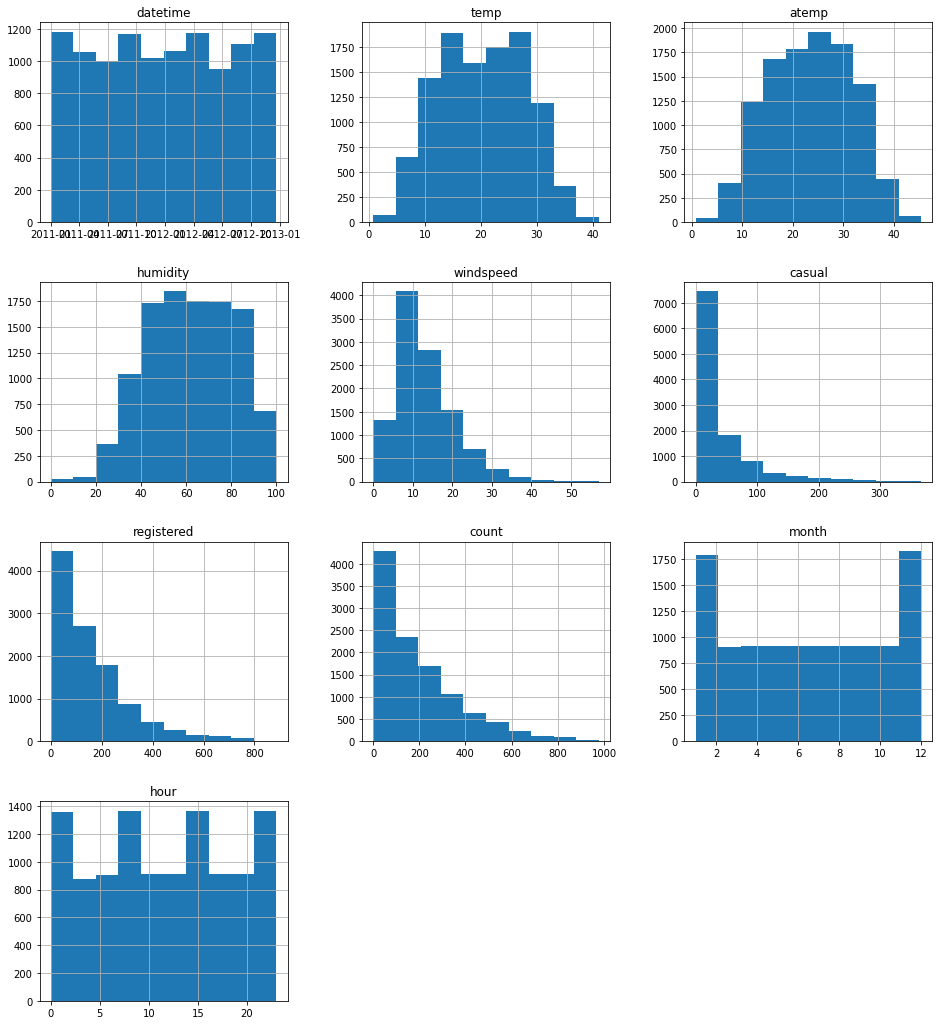

In [103]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(16,18))

## Step 5: Rerun the model with the same settings as before, just with more features

In [111]:
#ignore_columns = ['casual', 'registered', 'datetime']
ignore_columns = ['casual', 'registered']

predictor_new_features = TabularPredictor(label='count',
                             problem_type='regression',
                             eval_metric='root_mean_squared_error',
                             **{'learner_kwargs':
                             {'ignored_columns':ignore_columns}}).fit(train,
                                                                        presets='best_quality',
                                                                        time_limit=600)

No path specified. Models will be saved in: "AutogluonModels/ag-20211124_081521/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20211124_081521/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 14
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    15237.79 MB
	Train Data (Original)  Memory Usage: 0.66 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatur

	Ran out of time, early stopping on iteration 82. Best iteration is:
	[82]	train_set's rmse: 75.5223	valid_set's rmse: 74.451
	-84.9833	 = Validation score   (root_mean_squared_error)
	386.06s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 12.89s of the 212.87s of remaining time.
/home/mark.melling/projects/education/udacity/nd189-1-Introduction-to-Machine-Learning-project-starter/project/venv/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Ran out of time, early stopping on iteration 2. Best iteration is:
	[2]	train_set's rmse: 167.168	valid_set's rmse: 165.595
	Time limit exceeded... Skipping LightGBM_BAG_L1.
Fitting model: RandomForestMSE_BA

	-40.092	 = Validation score   (root_mean_squared_error)
	21.58s	 = Training   runtime
	0.61s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the -17.79s of remaining time.
	-39.986	 = Validation score   (root_mean_squared_error)
	0.35s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 618.18s ...
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20211124_081521/")


In [113]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L2  -38.814455       0.923121  398.331259                0.000935           0.335882            2       True          5
1  RandomForestMSE_BAG_L1  -38.833999       0.717973   11.937905                0.717973          11.937905            1       True          4
2     WeightedEnsemble_L3  -39.985965       1.877734  611.205254                0.000937           0.348537            3       True          8
3  RandomForestMSE_BAG_L2  -40.091987       1.688666  419.655097                0.608084          21.582979            2       True          7
4       LightGBMXT_BAG_L2  -65.439044       1.268713  589.273737                0.188131         191.201620            2       True          6
5       LightGBMXT_BAG_L1  -84.983287       0.204212  386.057472                

/home/mark.melling/projects/education/udacity/nd189-1-Introduction-to-Machine-Learning-project-starter/project/venv/lib/python3.8/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -122.07126958644449,
  'KNeighborsDist_BAG_L1': -120.27682477338874,
  'LightGBMXT_BAG_L1': -84.98328722028648,
  'RandomForestMSE_BAG_L1': -38.833999144601115,
  'WeightedEnsemble_L2': -38.81445506708203,
  'LightGBMXT_BAG_L2': -65.43904425830556,
  'RandomForestMSE_BAG_L2': -40.091987013984884,
  'WeightedEnsemble_L3': -39.985965139801145},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels/ag-20211124_081521/models/KNeighborsUnif_BAG_L1/',
  'KNeighborsDist_BAG

In [115]:
predictions_new_features = predictor_new_features.predict(test)

predictions_new_features.head()

0    11.630591
1     5.260767
2     3.106877
3     2.949972
4     2.980606
Name: count, dtype: float32

In [116]:
# Remember to set all negative values to zero
len(predictions_new_features[predictions_new_features < 0])

0

In [117]:
# Same submitting predictions
submission_new_features = pd.read_csv('data/sampleSubmission.csv', parse_dates=['datetime'])

submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)


In [118]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:01<00:00, 114kB/s]
Successfully submitted to Bike Sharing Demand

In [119]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2021-11-24 08:35:10  new features          complete  0.48141      0.48141       
submission_new_features.csv  2021-11-24 08:13:14  new features          complete  1.37974      1.37974       
submission.csv               2021-11-24 07:26:10  first raw submission  complete  1.37974      1.37974       
submission.csv               2021-11-23 08:26:32  first raw submission  complete  1.37974      1.37974       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
predictor_new_hpo = TabularPredictor(?).fit(?)

In [ ]:
predictor_new_hpo.fit_summary()

In [ ]:
# Remember to set all negative values to zero
?

In [ ]:
# Same submitting predictions
submission_new_hpo["count"] = ?
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [?, ?, ?],
    "hpo2": [?, ?, ?],
    "hpo3": [?, ?, ?],
    "score": [?, ?, ?]
})